# Import dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import norm
from scipy import stats
from scipy.stats import skew
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split

In [2]:
#chemin_csv='../../Data/full.csv'
chemin_csv_2019='../Data/full-2019.csv'
chemin_csv_2018='../Data/full-2018.csv'
chemin_csv_2017='../Data/full-2017.csv'
chemin_csv_2016='../Data/full-2016.csv'
chemin_csv_2015='../Data/full-2015.csv'

p = 0.1 # 1% of the lines

# keep the header, then take only 1% of lines
# if random from [0,1] interval is greater than 0.01 the row will be skipped

df=pd.read_csv(chemin_csv_2019,header=0,skiprows=lambda i: i>0 and random.random() > p,index_col=0,low_memory=False)

# Data exploration 

In [3]:
df.shape

(252927, 39)

In [4]:
df.dtypes

date_mutation                    object
numero_disposition                int64
nature_mutation                  object
valeur_fonciere                 float64
adresse_numero                  float64
adresse_suffixe                  object
adresse_nom_voie                 object
adresse_code_voie                object
code_postal                     float64
code_commune                     object
nom_commune                      object
code_departement                 object
ancien_code_commune             float64
ancien_nom_commune               object
id_parcelle                      object
ancien_id_parcelle               object
numero_volume                    object
lot1_numero                      object
lot1_surface_carrez             float64
lot2_numero                      object
lot2_surface_carrez             float64
lot3_numero                      object
lot3_surface_carrez             float64
lot4_numero                     float64
lot4_surface_carrez             float64


In [5]:
df.head()

,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,...,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
id_mutation,,,,,,,,,,,,,,,,,,,,,
2019-6,2019-01-08,1,Vente,45000.0,9.0,NaN,RTE DU VIADUC,0001,1250.0,01106,...,Maison,39.0,2.0,S,sols,NaN,NaN,631.0,5.452079,46.205294
2019-7,2019-01-04,1,Vente,65000.0,50.0,NaN,RUE DOC NODET,1240,1000.0,01053,...,Appartement,69.0,3.0,NaN,NaN,NaN,NaN,NaN,5.220604,46.193389
2019-10,2019-01-07,1,Vente,116000.0,1724.0,NaN,RTE DE MONTLEGER,0105,1560.0,01230,...,Maison,100.0,1.0,S,sols,NaN,NaN,2103.0,5.118903,46.438805
2019-18,2019-01-11,1,Vente,190000.0,8.0,NaN,ALL VINCENT BENONY,3735,1000.0,01053,...,Appartement,91.0,4.0,NaN,NaN,NaN,NaN,NaN,5.238679,46.200688
2019-18,2019-01-11,1,Vente,190000.0,8.0,NaN,ALL VINCENT BENONY,3735,1000.0,01053,...,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,5.238679,46.200688


In [6]:
#missing data
def miss_values(data) :
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

miss_values(df)

,Total,Percent
lot5_surface_carrez,252864,0.999751
ancien_id_parcelle,252844,0.999672
lot4_surface_carrez,252786,0.999443
ancien_nom_commune,252542,0.998478
ancien_code_commune,252542,0.998478
lot5_numero,252485,0.998252
lot3_surface_carrez,252416,0.997980
numero_volume,252224,0.997221
lot4_numero,252005,0.996355
lot3_numero,250372,0.989898


# Preprocessing 

In [7]:
 #drop features with to 60% null values 
df=df[df.columns[df.isnull().mean() < 0.5]]
df.dtypes

date_mutation                 object
numero_disposition             int64
nature_mutation               object
valeur_fonciere              float64
adresse_numero               float64
adresse_nom_voie              object
adresse_code_voie             object
code_postal                  float64
code_commune                  object
nom_commune                   object
code_departement              object
id_parcelle                   object
nombre_lots                    int64
code_type_local              float64
type_local                    object
nombre_pieces_principales    float64
code_nature_culture           object
nature_culture                object
surface_terrain              float64
longitude                    float64
latitude                     float64
dtype: object

In [8]:
#drop colum with same signification (code/signification) 
column_to_drop=['type_local','nature_culture','nom_commune']
df.drop(column_to_drop, axis=1, inplace=True)

#drop colum adress, w'll be working with longitude/latitude 
column_to_drop=['adresse_numero','adresse_nom_voie','adresse_code_voie']
df.drop(column_to_drop, axis=1, inplace=True)

#drop colum not useful for our context
column_to_drop=['id_parcelle','date_mutation','numero_disposition']
df.drop(column_to_drop, axis=1, inplace=True)

#drop rows where 'valeur_fonciere' is NaN
df = df.dropna(axis=0, subset=['valeur_fonciere'])

df.dtypes

nature_mutation               object
valeur_fonciere              float64
code_postal                  float64
code_commune                  object
code_departement              object
nombre_lots                    int64
code_type_local              float64
nombre_pieces_principales    float64
code_nature_culture           object
surface_terrain              float64
longitude                    float64
latitude                     float64
dtype: object

In [9]:
miss_values(df)

,Total,Percent
nombre_pieces_principales,115734,0.462729
code_type_local,115587,0.462141
surface_terrain,79170,0.316538
code_nature_culture,79163,0.316510
latitude,5130,0.020511
longitude,5130,0.020511
code_postal,2888,0.011547
nombre_lots,0,0.000000
code_departement,0,0.000000
code_commune,0,0.000000


In [10]:
df.head()

,nature_mutation,valeur_fonciere,code_postal,code_commune,code_departement,nombre_lots,code_type_local,nombre_pieces_principales,code_nature_culture,surface_terrain,longitude,latitude
id_mutation,,,,,,,,,,,,
2019-6,Vente,45000.0,1250.0,01106,01,0,1.0,2.0,S,631.0,5.452079,46.205294
2019-7,Vente,65000.0,1000.0,01053,01,2,2.0,3.0,NaN,NaN,5.220604,46.193389
2019-10,Vente,116000.0,1560.0,01230,01,0,1.0,1.0,S,2103.0,5.118903,46.438805
2019-18,Vente,190000.0,1000.0,01053,01,1,2.0,4.0,NaN,NaN,5.238679,46.200688
2019-18,Vente,190000.0,1000.0,01053,01,1,3.0,0.0,NaN,NaN,5.238679,46.200688


# Analyse data

In [11]:
df.describe()

,valeur_fonciere,code_postal,nombre_lots,code_type_local,nombre_pieces_principales,surface_terrain,longitude,latitude
count,2.501120e+05,247224.000000,250112.000000,134525.000000,134378.000000,1.709420e+05,244982.000000,244982.000000
mean,9.887819e+05,51945.645771,0.398114,1.989303,2.430435,3.000028e+03,1.832877,46.729606
std,8.333521e+06,27314.594012,0.807998,0.945379,2.082595,1.087781e+04,4.794218,3.919102
min,1.000000e-01,1000.000000,0.000000,1.000000,0.000000,1.000000e+00,-63.136158,-21.378399
25%,6.000000e+04,31200.000000,0.000000,1.000000,0.000000,2.350000e+02,0.036556,45.056585
50%,1.490000e+05,50290.000000,0.000000,2.000000,3.000000,6.150000e+02,2.238435,47.333329
75%,2.688000e+05,77134.000000,1.000000,3.000000,4.000000,1.874000e+03,3.562969,48.802742
max,1.750000e+09,97490.000000,110.000000,4.000000,41.000000,1.411524e+06,55.720528,51.082069


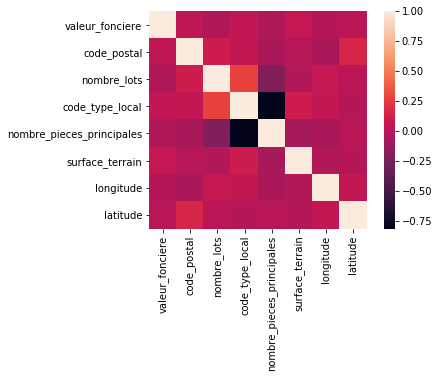

In [12]:
# Correlation Matrix Heatmap
corrmat = df.corr()
f, ax = plt.subplots()
sns.heatmap(corrmat, square=True);

In [13]:
#drop nombre_pieces_principales cause of the big correlation with  code_type_local 
column_to_drop=['nombre_pieces_principales']
df.drop(column_to_drop, axis=1, inplace=True)

In [14]:
y=df['valeur_fonciere']
X=df.drop('valeur_fonciere', axis=1)


 mu = 988781.86 and sigma = 8333504.13



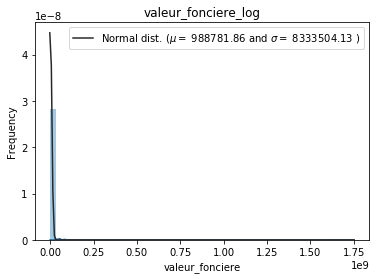

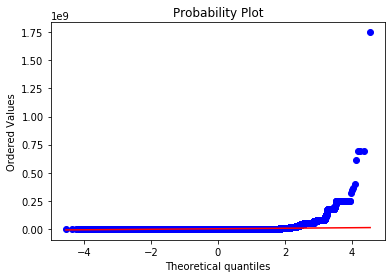

Skewness: 57.043578
Kurtosis: 8711.956356


In [15]:
# Plot Histogram
sns.distplot(y, fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(y)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('valeur_fonciere_log')

fig = plt.figure()
res = stats.probplot(y, plot=plt)
plt.show()

print("Skewness: %f" % y.skew())
print("Kurtosis: %f" % y.kurt())

# Fill missing values

In [16]:
miss_values(df)

,Total,Percent
code_type_local,115587,0.462141
surface_terrain,79170,0.316538
code_nature_culture,79163,0.316510
latitude,5130,0.020511
longitude,5130,0.020511
code_postal,2888,0.011547
nombre_lots,0,0.000000
code_departement,0,0.000000
code_commune,0,0.000000
valeur_fonciere,0,0.000000


In [17]:
df["code_nature_culture"] = df["code_nature_culture"].fillna("None")

for col in ('code_postal','longitude','latitude','surface_terrain','code_type_local'):
    df[col] = df.groupby("code_departement")[col].transform(lambda x: x.fillna(x.median()))


In [18]:
#drop rows where 'code_type_local' is NaN
df = df.dropna(axis=0, subset=['code_type_local'])
miss_values(df)

,Total,Percent
latitude,0,0.0
longitude,0,0.0
surface_terrain,0,0.0
code_nature_culture,0,0.0
code_type_local,0,0.0
nombre_lots,0,0.0
code_departement,0,0.0
code_commune,0,0.0
code_postal,0,0.0
valeur_fonciere,0,0.0


# Transformation 

In [19]:
df.dtypes

nature_mutation         object
valeur_fonciere        float64
code_postal            float64
code_commune            object
code_departement        object
nombre_lots              int64
code_type_local        float64
code_nature_culture     object
surface_terrain        float64
longitude              float64
latitude               float64
dtype: object

In [20]:
df["code_postal"]=df["code_postal"].apply(str)
df["code_type_local"]=df["code_type_local"].apply(str)

In [21]:
df.dtypes

nature_mutation         object
valeur_fonciere        float64
code_postal             object
code_commune            object
code_departement        object
nombre_lots              int64
code_type_local         object
code_nature_culture     object
surface_terrain        float64
longitude              float64
latitude               float64
dtype: object

In [22]:
df = df.drop(['nature_mutation', 'longitude', 'latitude'], axis=1)
df.reset_index()

,id_mutation,valeur_fonciere,code_postal,code_commune,code_departement,nombre_lots,code_type_local,code_nature_culture,surface_terrain
0,2019-6,45000.0,1250.0,01106,01,0,1.0,S,631.0
1,2019-7,65000.0,1000.0,01053,01,2,2.0,None,576.5
2,2019-10,116000.0,1560.0,01230,01,0,1.0,S,2103.0
3,2019-18,190000.0,1000.0,01053,01,1,2.0,None,576.5
4,2019-18,190000.0,1000.0,01053,01,1,3.0,None,576.5
...,...,...,...,...,...,...,...,...,...
250107,2019-1102362,20000000.0,75002.0,75102,75,0,2.0,S,447.0
250108,2019-1102364,295000.0,75004.0,75104,75,1,2.0,None,516.0
250109,2019-1102368,380000.0,75004.0,75104,75,2,4.0,None,516.0
250110,2019-1102374,27200000.0,75002.0,75102,75,0,4.0,S,354.0



 mu = 11.58 and sigma = 2.04



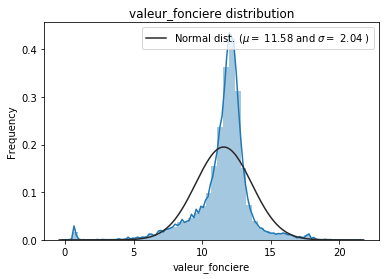

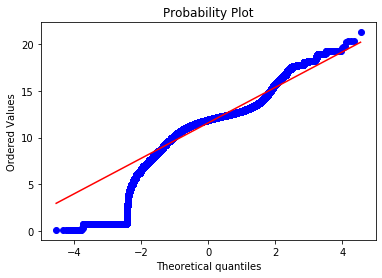

Skewness: -1.403940
Kurtosis: 6.735101


In [23]:
# We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df["valeur_fonciere"] = np.log1p(df["valeur_fonciere"])
                                
#Check the new distribution 
sns.distplot(df["valeur_fonciere"] , fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df["valeur_fonciere"])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('valeur_fonciere distribution')

fig = plt.figure()
res = stats.probplot(df["valeur_fonciere"], plot=plt)
plt.show()

y_train = df.valeur_fonciere.values

print("Skewness: %f" % df["valeur_fonciere"].skew())
print("Kurtosis: %f" % df["valeur_fonciere"].kurt())

In [24]:
numeric_feats = df.dtypes[df.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skewed Features' :skewed_feats})
skewness.head()

,Skewed Features
surface_terrain,36.851448
nombre_lots,26.490187
valeur_fonciere,-1.403932


In [25]:
skewness = skewness[abs(skewness) > 0.5]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p

skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    df[feat] = boxcox1p(df[feat], lam)
    df[feat] += 1

There are 3 skewed numerical features to Box Cox transform


In [26]:
miss_values(df)

,Total,Percent
surface_terrain,0,0.0
code_nature_culture,0,0.0
code_type_local,0,0.0
nombre_lots,0,0.0
code_departement,0,0.0
code_commune,0,0.0
code_postal,0,0.0
valeur_fonciere,0,0.0


In [27]:
#drop rows where 'longitude' is NaN
#df = df.dropna(axis=0, subset=['longitude'])

#drop rows where 'latitude' is NaN
#df = df.dropna(axis=0, subset=['latitude'])

In [28]:
numeric_feats = df.dtypes[df.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skewed Features' :skewed_feats})
skewness.head()

,Skewed Features
nombre_lots,1.407951
surface_terrain,1.257208
valeur_fonciere,-4.275381


In [ ]:
df = pd.get_dummies(df)
print(df.shape)

In [ ]:
df.head()

# Modeling and Predictions

In [ ]:
y=df['valeur_fonciere']
X=df.drop('valeur_fonciere', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train, X_test = scaler.transform(X_train), scaler.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(8)
pca.fit(X_train)
X_train, X_test = pca.transform(X_train), pca.transform(X_test)

In [ ]:
y.describe()

In [ ]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# Cross-validation with k-folds
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [ ]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.05, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.05, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
LR = make_pipeline(RobustScaler(), LinearRegression(-1))

In [ ]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [ ]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [ ]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [ ]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [ ]:
score = rmsle_cv(LR)
print("Ordinary Linear Regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [ ]:
regr = LinearRegression()
regr.fit(X_train, y_train)

y_test_pred = regr.predict(X_test)
y_train_pred = regr.predict(X_train)

from sklearn.metrics import r2_score

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

In [ ]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [ ]:
ENet.fit(X_train, y_train)
train_pred = ENet.predict(X_train)
pred = ENet.predict(X_test.values)
print(rmsle(y_test, pred))